In [1]:
import pandas as pd
import numpy as np
import os
import numpy as np
import math
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
iris = pd.read_csv('~/DSI-course-materials/curriculum/04-lessons/week-07/2.1-lesson/assets/datasets/iris.csv')

In [41]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 1: Split the set into two sets

"X" will be the data and "Y" will be the class labels

In [42]:
X = iris.drop(labels = ["Name"], axis = 1)
y = iris["Name"].astype("category")

## Step 2: Explore the Data

Next - Let's plot! You can use any plotting library of your choice, but be sure to explore all of the data. 

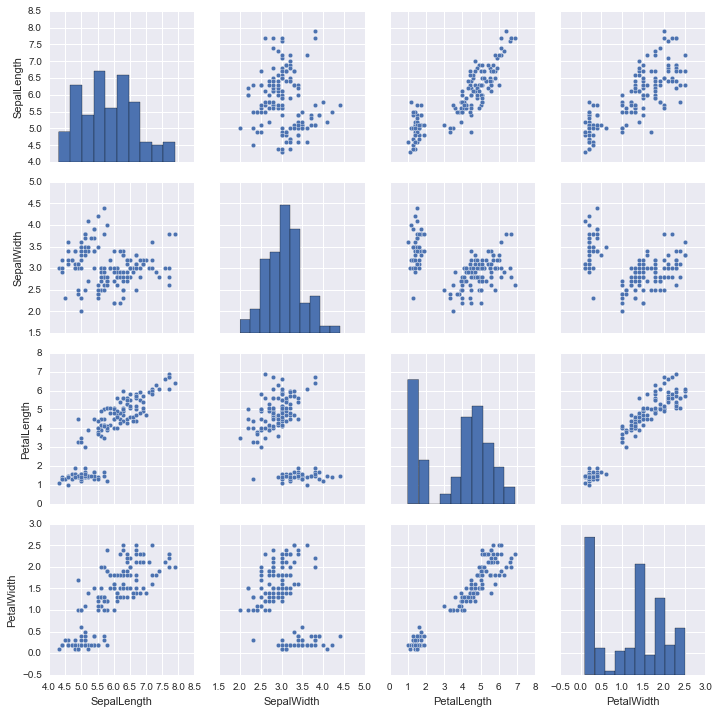

In [43]:
sns.pairplot(X)
plt.show()

In [44]:
sns.plt.plot.line(X)
sns.plt.show()

AttributeError: 'function' object has no attribute 'line'

## Step 3: Dimensionality Reduction

First, standarize the data. While the Iris data attributes are all measured in the same units (cm), this is a worthwhile step for optimization and good practice for more unruly datasets!

In [15]:
X = StandardScaler().fit_transform(X)

Now, let's set up our data for decomposition by creating a covariance matrix

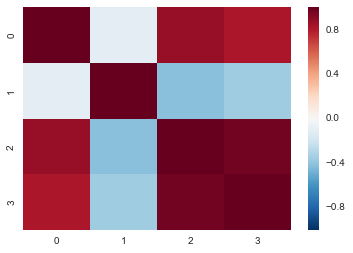

In [24]:
covariance_matrix = np.cov(X.T)
sns.heatmap(covariance_matrix)
sns.plt.show()

Now, decompose the the covariance matrix

In [25]:
eigenValues, eigenVectors = np.linalg.eig(covariance_matrix)

Check the eigenvalues and eigenvectors

[ 2.93035378  0.92740362  0.14834223  0.02074601]


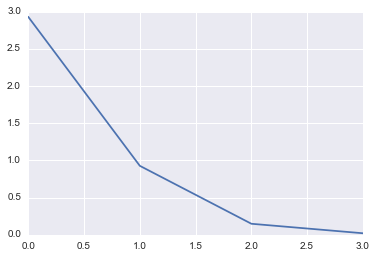

In [37]:
print(eigenValues)
plt.plot(eigenValues)
sns.plt.show()

In [27]:
print(eigenVectors)

[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


The eigenvectors with the lowest eigenvalues can be dropped

In [32]:
eigenpairs = [[eigenValues[i], eigenVectors[:, i]] for i in range(len(eigenValues))]
significant_eigenpairs = eigenpairs[0:2]

Calculate the explained variance

In [38]:
tot = sum(eigenValues)
var_exp = [(i / tot)*100 for i in sorted(eigenValues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

What does the explained variance tell us?

In [39]:
cum_var_exp

array([  72.77045209,   95.80097536,   99.48480732,  100.        ])